In [2]:
!pip3 install utils

In [3]:
!pip3 install fastai2

     |████████████████████████████████| 184kB 2.8MB/s 


In [4]:
!pip3 install nbdev

     |████████████████████████████████| 51kB 1.7MB/s 


In [5]:
!pip3 install azure.cognitiveservices.search.imagesearch

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 40kB 4.0MB/s 
     |████████████████████████████████| 92kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 2.7MB 17.8MB/s 


In [0]:
from fastai import *
from fastai.vision import *

#code defect fixed by:

In [0]:
# Numpy and pandas by default assume a narrow screen - this fixes that
from fastai2.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

def get_image_files_sorted(path, recurse=True, folders=None): return get_image_files(path, recurse, folders).sorted()


# +
# pip install azure-cognitiveservices-search-imagesearch

from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth

def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)


# -

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)

# +
from sklearn.tree import export_graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=0, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


# +
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

In [0]:

#hide
from utils import *
from fastai2.vision.widgets import *

###Data download(Need Credit card for KEY)

In [0]:
key = '87a55beee08b4bcba6e2c7b4767d8b30'

In [0]:
search_images_bing

<function __main__.search_images_bing>

In [0]:
results = search_images_bing(key, 'Damaged box')
ims = results.attrgot('content_url')
len(ims)

ErrorResponseException: ignored

###skipped data downloading process:


In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/data/box test')

In [0]:
#try New data blolck API:
dblock = DataBlock(blocks = (ImageBlock,CategoryBlock),
                   get_items=get_image_files,
                   get_y = parent_label,
                   splitter=RandomSplitter(valid_pct=0.2,seed=42),
                   item_tfms=Resize(128))    #size could be changed later
                   #batch_tfms=aug_transforms()) #add batch_tfms

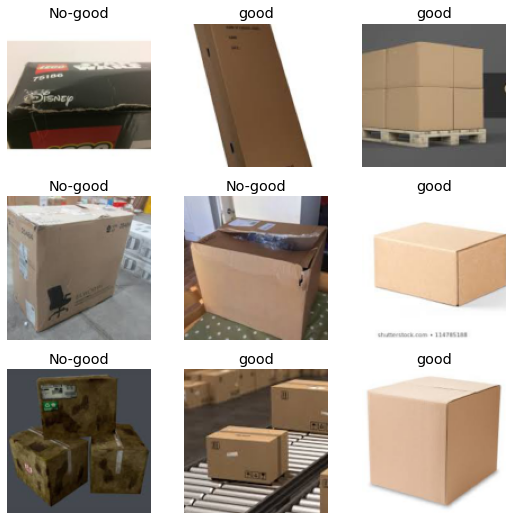

In [0]:
dls = dblock.dataloaders(path)
dls.show_batch()

In [0]:

boxes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [0]:
dls = boxes.dataloaders(path)

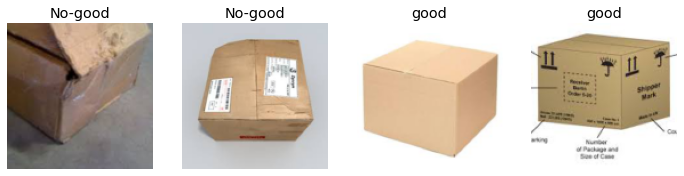

In [0]:

dls.valid.show_batch(max_n=4, nrows=1)

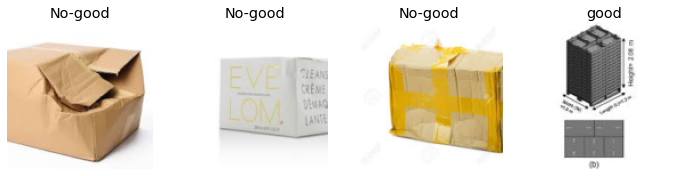

In [0]:
dls.train.show_batch(max_n=4, nrows=1)

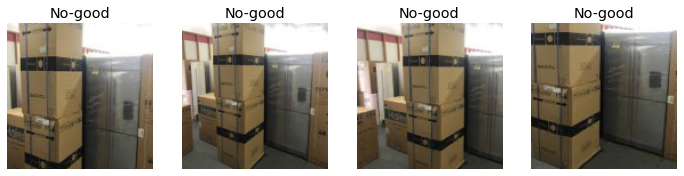

In [0]:

boxes = boxes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = boxes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Data Augurment:

In [0]:
boxes = boxes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = boxes.dataloaders(path)

In [0]:

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.save('/content/drive/My Drive/Colab Notebooks/data/box test/models/FastAi2BoxClassify0426')

In [0]:
learn.load('/content/drive/My Drive/Colab Notebooks/data/box test/models/FastAi2BoxClassify0426')

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.export('/content/drive/My Drive/Colab Notebooks/data/box test/models/export.pkl') #this is for develop the appliance further...

#Looks great...now let's dive in：

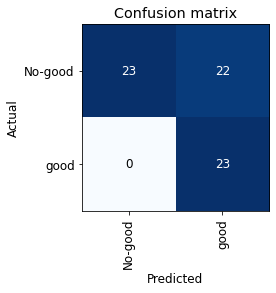

In [0]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

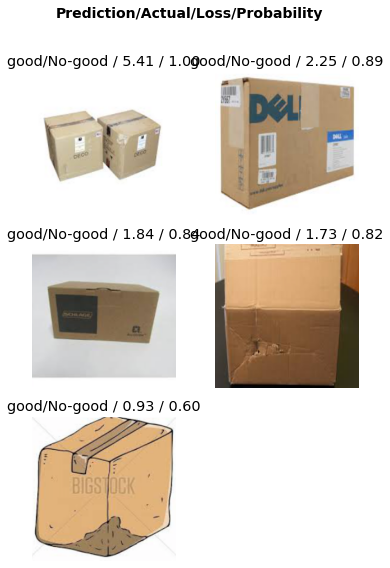

In [0]:
interp.plot_top_losses(5, nrows=3)

In [0]:

#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [0]:
for idx in cleaner.delete(): cleaner.get_image_files(path)[idx].unlink()

In [0]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.get_image_files(path)[idx]), path/cat)

##Need more time to fine-tune:

In [0]:
learn.unfreeze()

###Build APP:

In [0]:
learn_inf = load_learner('/content/drive/My Drive/Colab Notebooks/data/box test/models/export.pkl')

In [10]:
learn_inf.dls.vocab

(#2) ['No-good','good']

###APP based on 1. IPython widgets (ipywidgets) 2.Voilà

In [11]:

#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [0]:

img = PILImage.create(btn_upload.data[-1])

In [14]:

#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [15]:
pred,pred_idx,probs = learn_inf.predict(img)

In [16]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: No-good; Probability: 0.9991')

In [17]:
#hide_output
btn_run = widgets.Button(description='【Enter】')
btn_run

Button(description='【Enter】', style=ButtonStyle())

In [0]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [0]:

#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [0]:
VBox??

In [21]:

#hide_output
VBox([widgets.Label('Select your Carton!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

##set all we need ,next to develop it...

In [22]:
#hide
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
